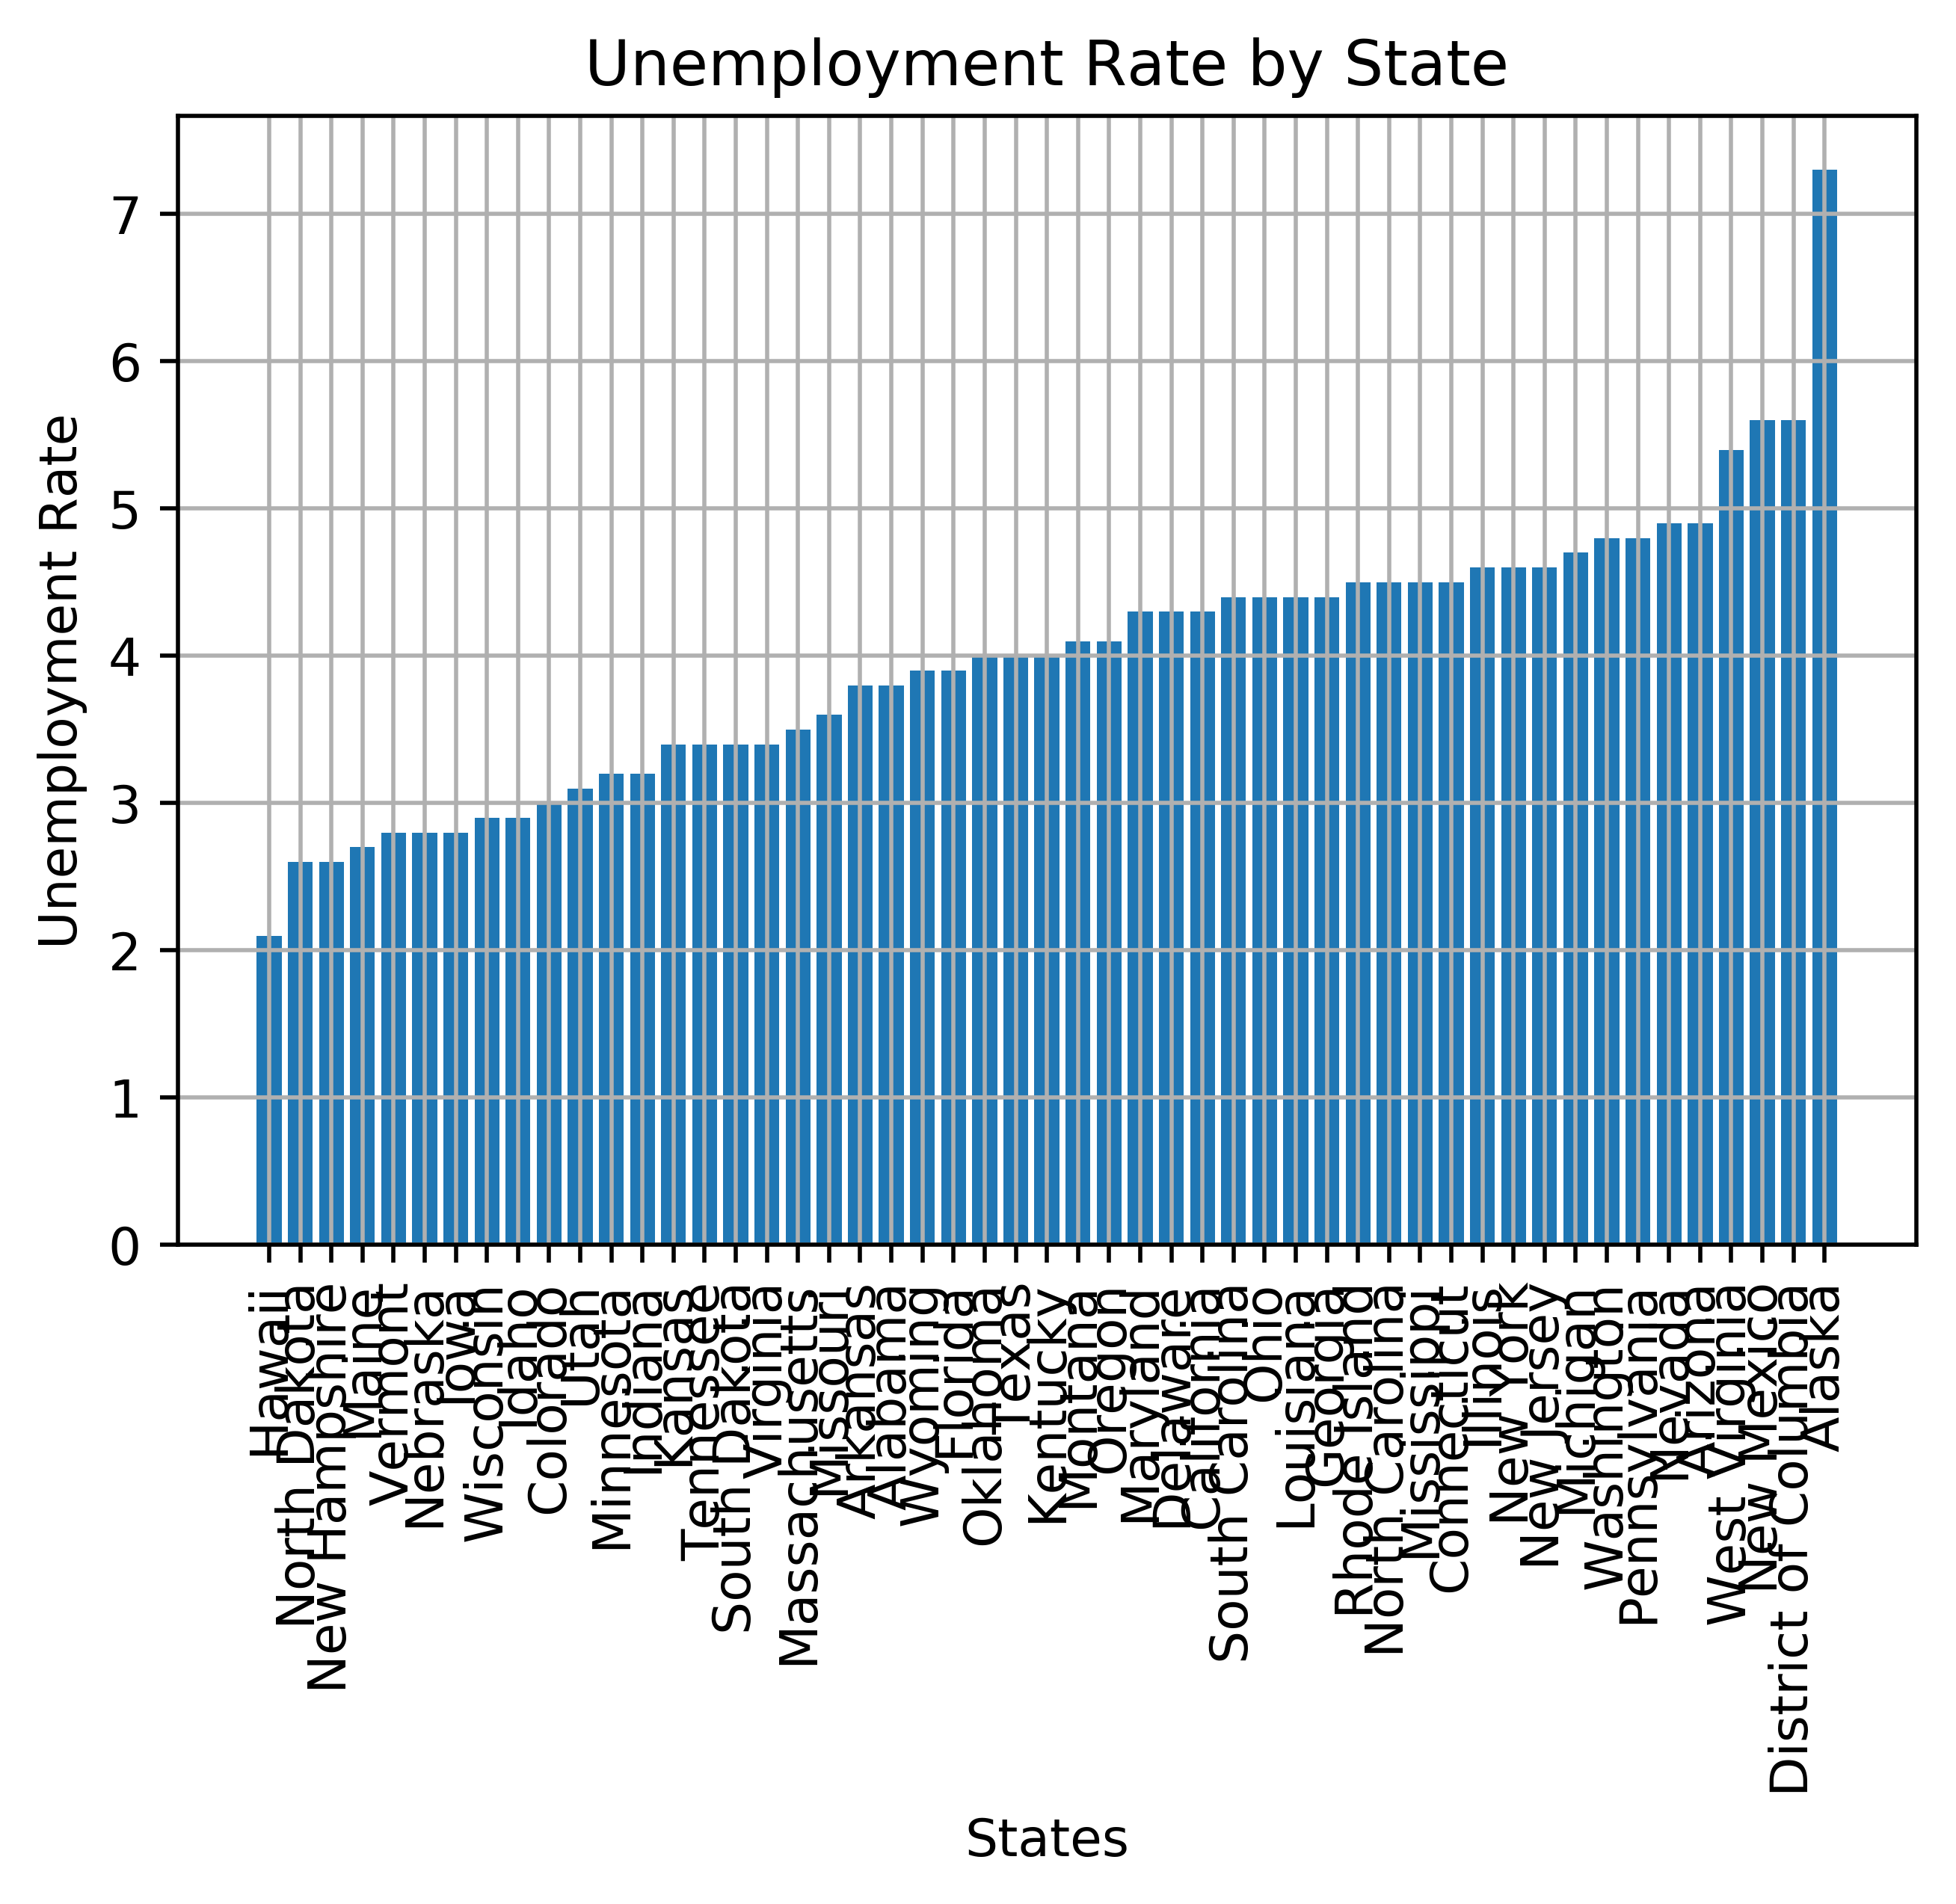

<Figure size 432x288 with 0 Axes>

In [11]:
# imports and froms
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia as wp

# enter the h1 element from the article in wp.page(h1)
# https://en.wikipedia.org/wiki/List of U.S. states and territories by unemployment rate

html = wp.page("List of U.S. states and territories by unemployment rate").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html)[0]

# remove unneeded rows and columns
df_drop = df.drop([0, 1, 2, 3, 21])
df_drop = df_drop.drop(columns = ['Rank', 'Rank(50 states)', 'Monthly change (%) (=drop in unemployment)'])

# convert text to numeric
df_convert = df_drop['Unemployment rate (seasonally adjusted)'].apply(lambda x: x.split('%')[0].strip()).astype(float)

# combine lists
df_combine = pd.DataFrame(zip(df_drop['Statefederal district or territory'], df_convert))

# rename columns
df_rename = df_combine.rename(columns = {0: 'State', 1: 'Unemployment'})

# sort by state and save a csv
df_sort_state = df_rename.sort_values(['Unemployment'])
df2 = df_sort_state
df2.to_csv('states_by_unemployment_rate.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.title('Unemployment Rate by State')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel('Unemployment Rate')
plt.grid()
plt.bar(df2['State'], df2['Unemployment'])
plt.show()
plt.savefig('unemployment_state.png')